<a href="https://colab.research.google.com/github/GOLISHYAMP/Colab_Notebooks/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [8]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
dataset.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

# **Lets create a Dataframe**

In [11]:
df = pd.DataFrame(data = dataset.data , columns=dataset.feature_names)

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
dataset.target_names

['MedHouseVal']

In [14]:
df['MedHouseVal'] = dataset.target

In [15]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# **Spliting of the data into dependent and independent variables.**

In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [19]:
X.shape, y.shape

((20640, 8), (20640,))

# **Splitting the data into the train and test data**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

# **Standard scaling the features**

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [25]:
X_train_scaled

array([[ 0.28202705,  0.18557923, -0.32295769, ..., -0.04687597,
        -0.79543244,  0.77858458],
       [-0.21274505,  0.89835081, -0.19073272, ..., -0.02378648,
         0.95153334, -1.26121131],
       [-0.02775842, -1.47755446, -0.03381263, ..., -0.06393588,
         0.32393705,  0.10865162],
       ...,
       [ 0.78364466,  0.58156344,  0.34130536, ...,  0.07609582,
         0.93748267, -1.26121131],
       [-0.14507985,  0.5023666 , -0.39117374, ..., -0.06557157,
        -0.67366003,  0.58360409],
       [ 0.33557997, -1.08157025,  0.44339882, ..., -0.01003082,
        -1.36214252,  1.29353305]])

Lets visualize the features, before and after scaling

<ipython-input-26-c303d8d92743>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'Feature after scaling')

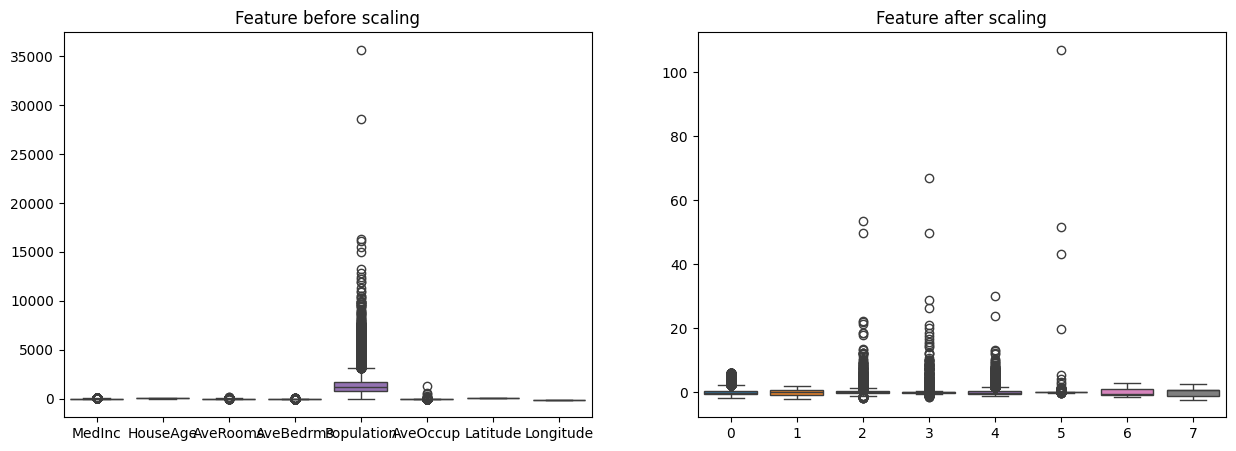

In [26]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("Feature before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("Feature after scaling")

# **Model Training**

In [28]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
y_pred = mlr.predict(X_test_scaled)
y_pred

array([1.54437818, 2.2259289 , 2.17228622, ..., 0.72827437, 3.97327877,
       1.62721245])

# **Lets evaluate the model**

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f' mae : {mae}\n mse : {mse}\n r2_score : {r2}')

 mae : 0.5272533316379394
 mse : 0.5209426103218228
 r2_score : 0.6030139017639451


<Axes: xlabel='MedHouseVal', ylabel='Count'>

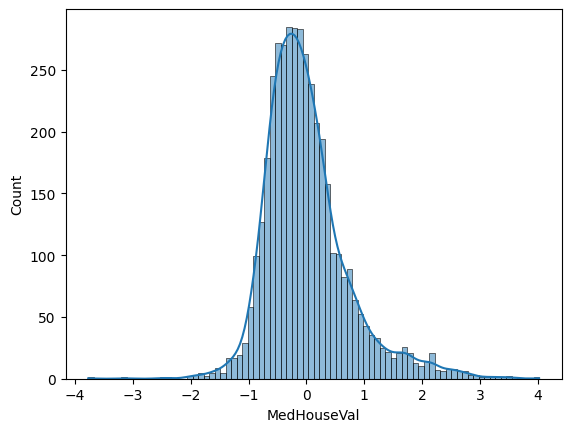

In [31]:
residual = y_test-y_pred
sns.histplot(residual, kde=True)

# **Ok, model seems to be trained good**

In [35]:
mlr.coef_

array([ 0.83060952,  0.11868294, -0.27227523,  0.31579869, -0.00441432,
       -0.04009636, -0.90765014, -0.87568102])

Model is least dependent on the 5th column

In [37]:
dataset.feature_names[4]

'Population'

In [36]:
mlr.intercept_

2.071535833938961